In [47]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [24]:
df = pd.read_csv('covid/full_grouped.csv')

In [25]:
df.head()

,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,WHO Region
0,2020-01-22,Afghanistan,0,0,0,0,0,0,0,Eastern Mediterranean
1,2020-01-22,Albania,0,0,0,0,0,0,0,Europe
2,2020-01-22,Algeria,0,0,0,0,0,0,0,Africa
3,2020-01-22,Andorra,0,0,0,0,0,0,0,Europe
4,2020-01-22,Angola,0,0,0,0,0,0,0,Africa


In [26]:
df = df.sort_values(['Date','Deaths','Active','New cases'],ascending=False)

In [27]:
df = df.set_index('Date')

In [32]:
df_country_grouped = df.groupby('Country/Region')
df_country_grouped = df_country_grouped.first().sort_values(['Confirmed','Deaths','Active'],ascending=False)
print(df_country_grouped)

                       Confirmed  Deaths  Recovered   Active  New cases  \
Country/Region                                                            
US                       4290259  148011    1325804  2816444      56336   
Brazil                   2442375   87618    1846641   508116      23284   
India                    1480073   33408     951166   495499      44457   
Russia                    816680   13334     602249   201097       5607   
South Africa              452529    7067     274925   170537       7096   
...                          ...     ...        ...      ...        ...   
Dominica                      18       0         18        0          0   
Saint Kitts and Nevis         17       0         15        2          0   
Greenland                     14       0         13        1          1   
Holy See                      12       0         12        0          0   
Western Sahara                10       1          8        1          0   

                       N

<Axes: xlabel='Country/Region'>

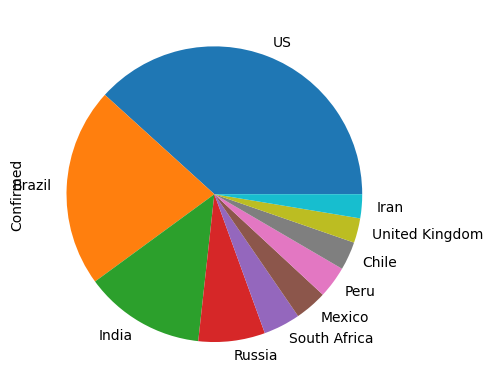

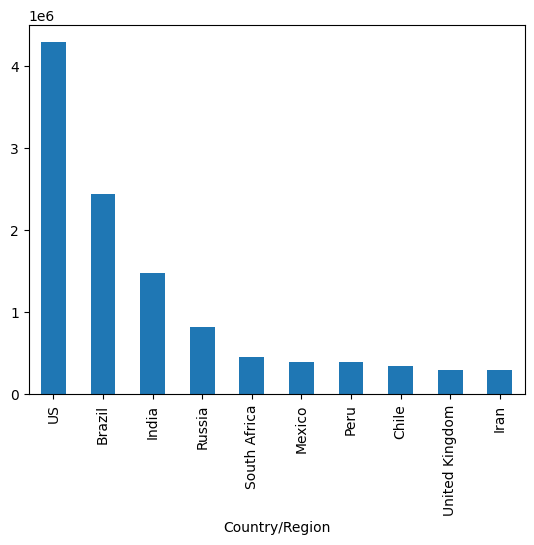

In [48]:
df_country_grouped.iloc[0:10]['Confirmed'].plot(kind='pie')
plt.figure()
df_country_grouped.iloc[0:10]['Confirmed'].plot(kind='bar')

<Axes: xlabel='Country/Region'>

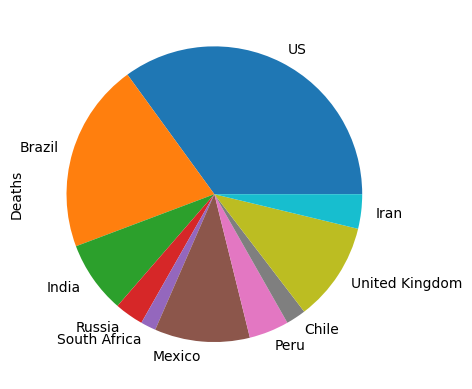

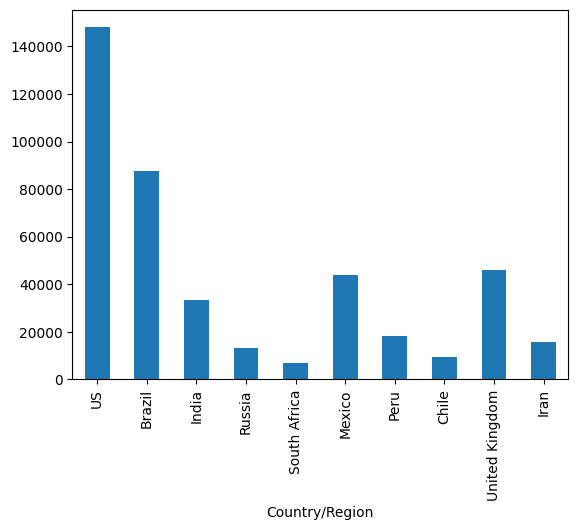

In [49]:
df_country_grouped.iloc[0:10]['Deaths'].plot(kind='pie')
plt.figure()
df_country_grouped.iloc[0:10]['Deaths'].plot(kind='bar')


<Axes: ylabel='Recovered'>

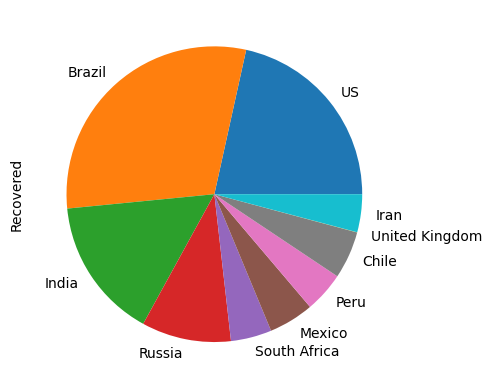

In [42]:
df_country_grouped.iloc[0:10]['Recovered'].plot(kind='pie')
plt.figure()
df_country_grouped.iloc[0:10]['Recovered'].plot(kind='bar')


<Axes: xlabel='Country/Region'>

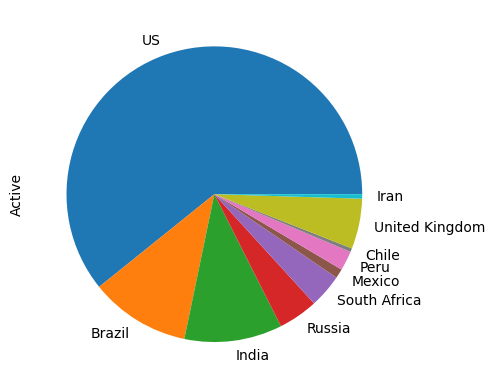

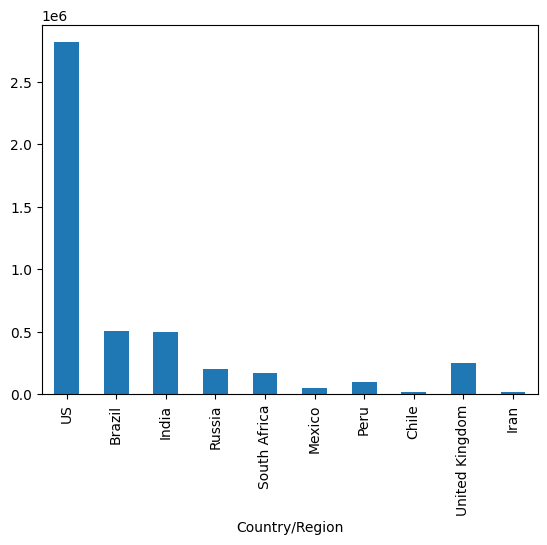

In [50]:
df_country_grouped.iloc[0:10]['Active'].plot(kind='pie')
plt.figure()
df_country_grouped.iloc[0:10]['Active'].plot(kind='bar')

In [73]:
df_grouped_by_date = df.groupby('Date').sum().drop(['Country/Region','WHO Region'],axis=1)
df_grouped_by_date

,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
Date,,,,,,,
2020-01-22,555,17,28,510,0,0,0
2020-01-23,654,18,30,606,99,1,2
2020-01-24,941,26,36,879,287,8,6
2020-01-25,1434,42,39,1353,493,16,3
2020-01-26,2118,56,52,2010,684,14,13
...,...,...,...,...,...,...,...
2020-07-23,15510481,633506,8710969,6166006,282756,9966,169714
2020-07-24,15791645,639650,8939705,6212290,281164,6144,228736
2020-07-25,16047190,644517,9158743,6243930,255545,4867,219038


<Axes: xlabel='Date'>

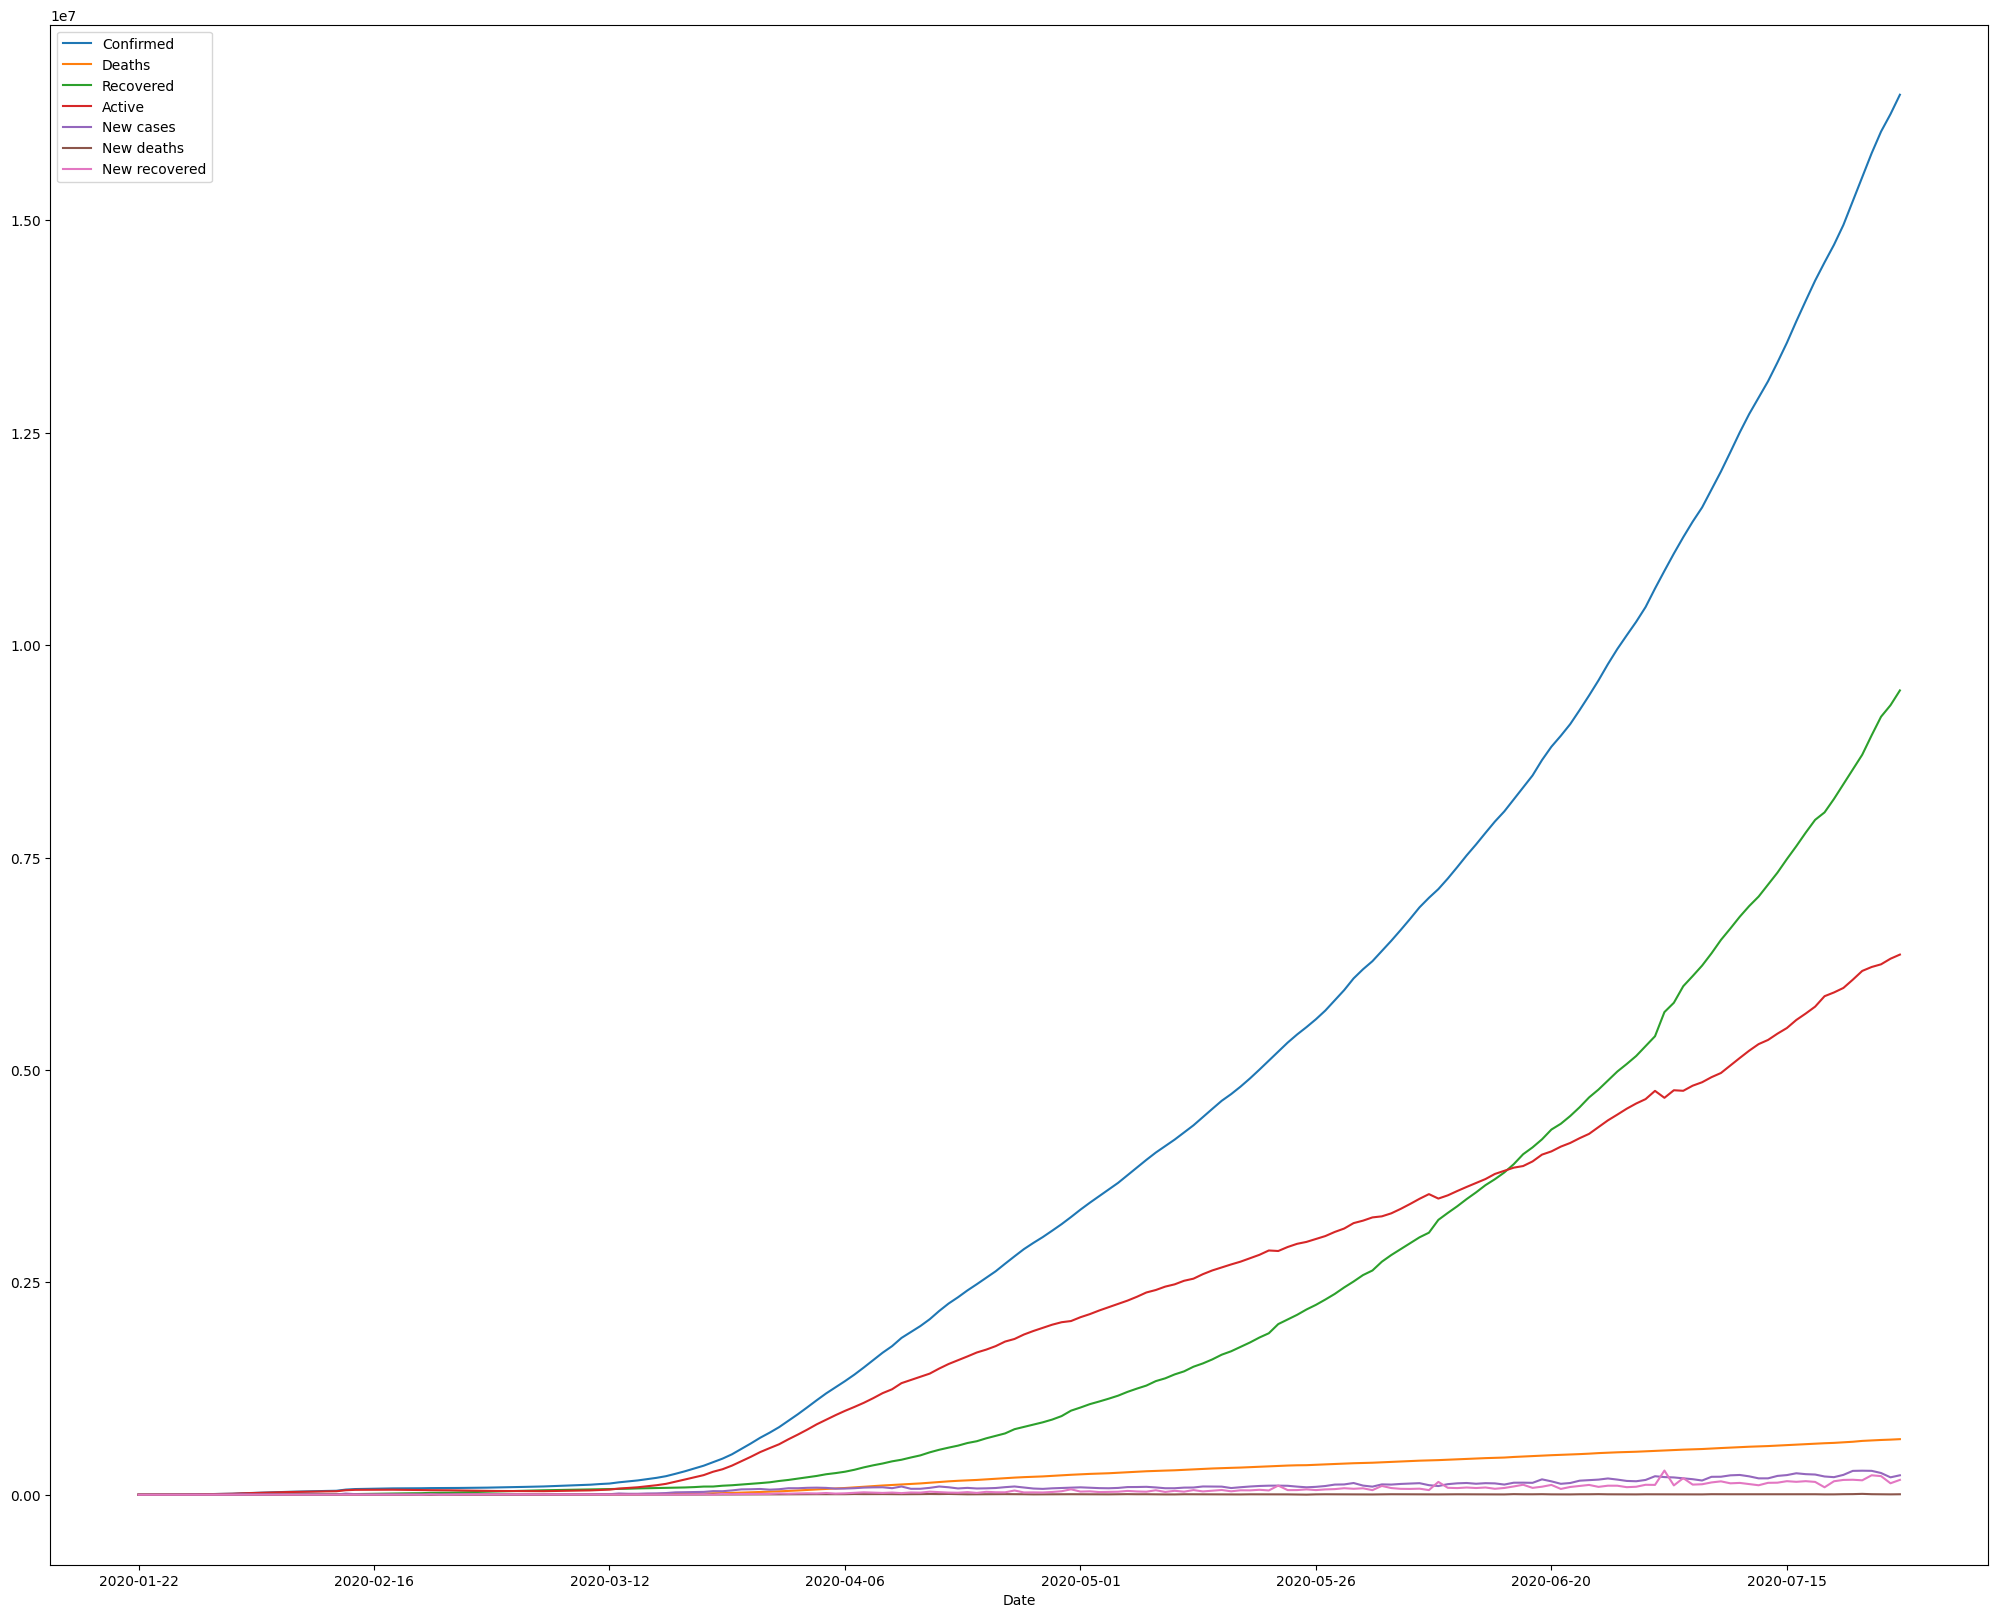

In [77]:
df_grouped_by_date.plot(figsize=(25,20))

C:\Users\TMAX27\AppData\Local\Temp\ipykernel_4512\1767327117.py:1: FutureWarning: The provided callable <function sum at 0x0000012D90085090> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'sum' instead.
  df.pivot_table(values=['Deaths'],index='Country/Region',aggfunc=[np.sum,np.mean]).sort_values(by=[('mean','Deaths')],ascending=False).iloc[0:15]['mean'].plot(kind='barh')
C:\Users\TMAX27\AppData\Local\Temp\ipykernel_4512\1767327117.py:1: FutureWarning: The provided callable <function mean at 0x0000012D90085FC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass 'mean' instead.
  df.pivot_table(values=['Deaths'],index='Country/Region',aggfunc=[np.sum,np.mean]).sort_values(by=[('mean','Deaths')],ascending=False).iloc[0:15]['mean'].plot(kind='barh')


<Axes: ylabel='Country/Region'>

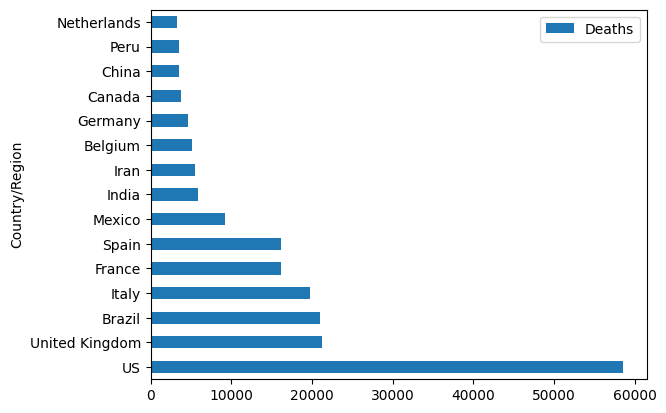

In [103]:
df.pivot_table(values=['Deaths'],index='Country/Region',aggfunc=[np.sum,np.mean]).sort_values(by=[('mean','Deaths')],ascending=False).iloc[0:15]['mean'].plot(kind='barh')